# Forecasting van warmtevraag i.f.v. kermerken van gebouwen

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns

from sklearn import preprocessing,ensemble
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


## Data inlezen

In [2]:
df1 = pd.read_csv('gebouwen.csv')
df1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Data verkening

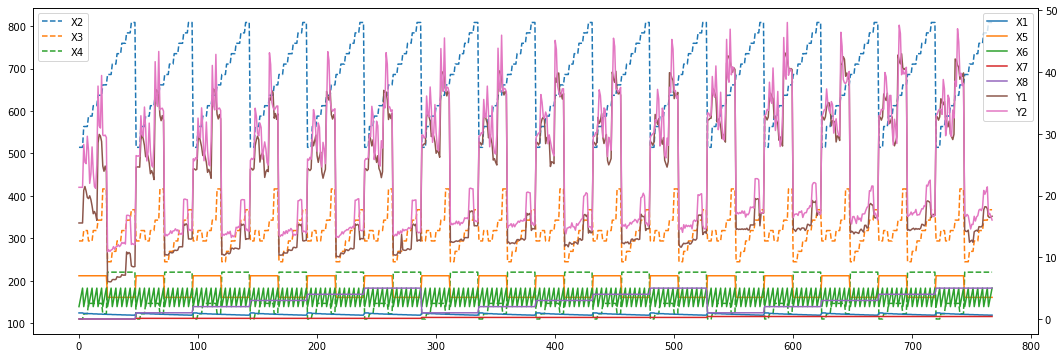

In [3]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx() 
X_high = ['X2', 'X3', 'X4']
X_low = ['X1', 'X5', 'X6', 'X7', 'X8',  'Y1', 'Y2']
df1[X_high].plot(figsize = (18,6), ax = ax1, style = '--')
df1[X_low].plot(figsize = (18,6), ax = ax2)

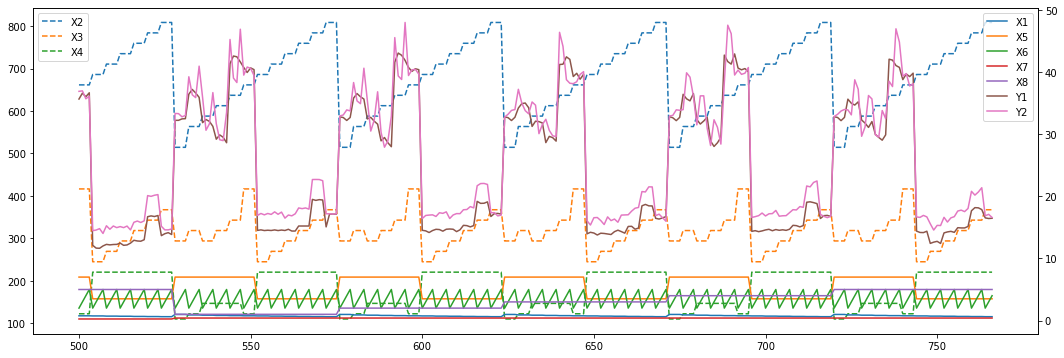

In [4]:
df1_sub = df1.iloc[500:-1]

f, ax1 = plt.subplots()
ax2 = ax1.twinx() 
df1_sub[X_high].plot(figsize = (18,6), ax = ax1, style = '--')
df1_sub[X_low].plot(figsize = (18,6), ax = ax2)

In [5]:
df1['phase'] = (df1.index / 48).astype(int)
df1['cycle'] = (df1.index % 48)
df1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,phase,cycle
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0,2
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0,3
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,15,43
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,15,44
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,15,45
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,15,46


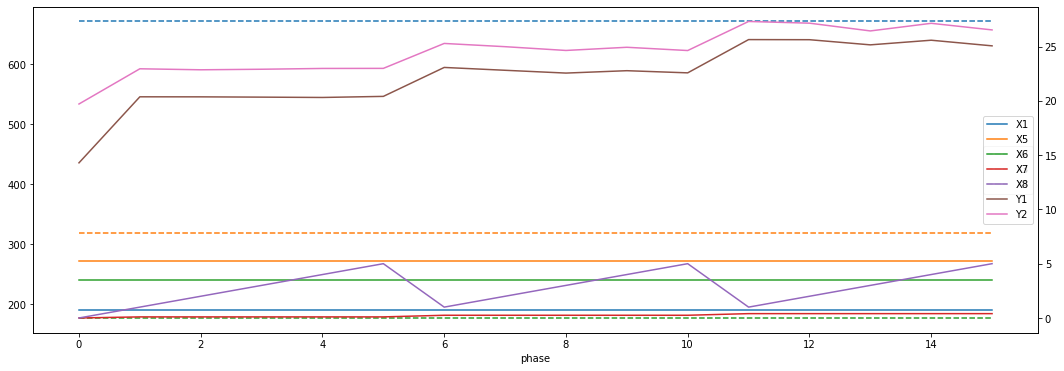

In [6]:
df2 = df1.groupby('phase').mean()

f, ax1 = plt.subplots()
ax2 = ax1.twinx() 
X_high = ['X2', 'X3', 'X4']
X_low = ['X1', 'X5', 'X6', 'X7', 'X8',  'Y1', 'Y2']
df2[X_high].plot(figsize = (18,6), ax = ax1, style = '--')
df2[X_low].plot(figsize = (18,6), ax = ax2)

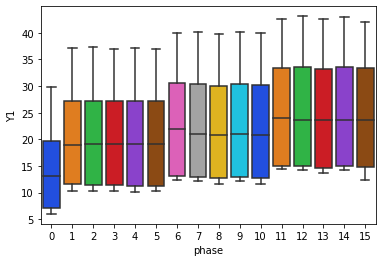

In [7]:
sns.boxplot(data=df1,x='phase',y='Y1', palette = 'bright')

48.0

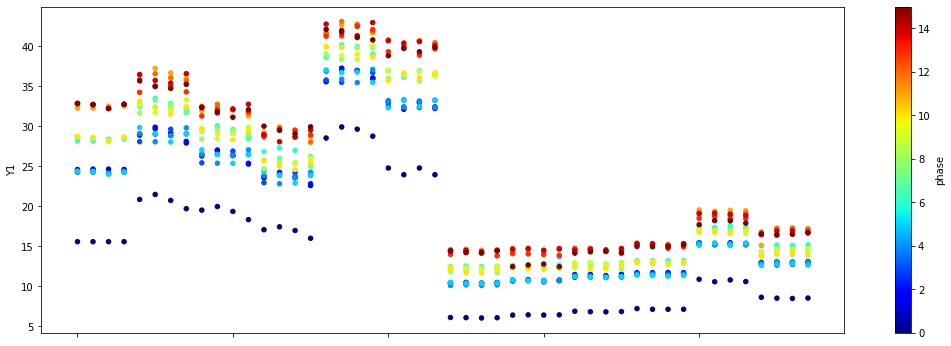

In [8]:
df1.plot.scatter(x='cycle', y='Y1', c = 'phase', cmap = 'jet', figsize = (18,6))
768/16

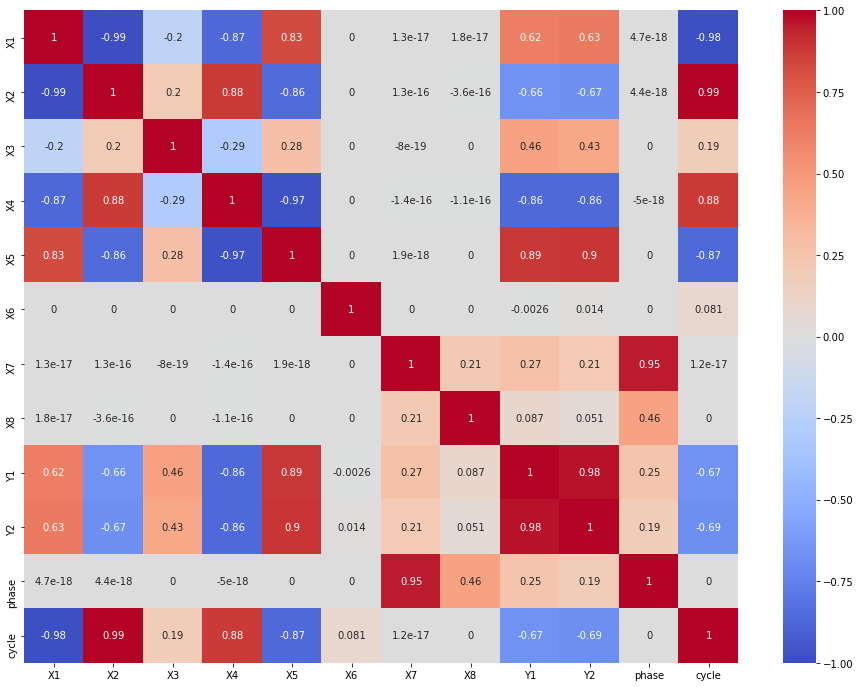

In [9]:
fig, ax = plt.subplots(figsize=(16,12)) 
hmap=sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True, ax = ax, cmap = 'coolwarm')

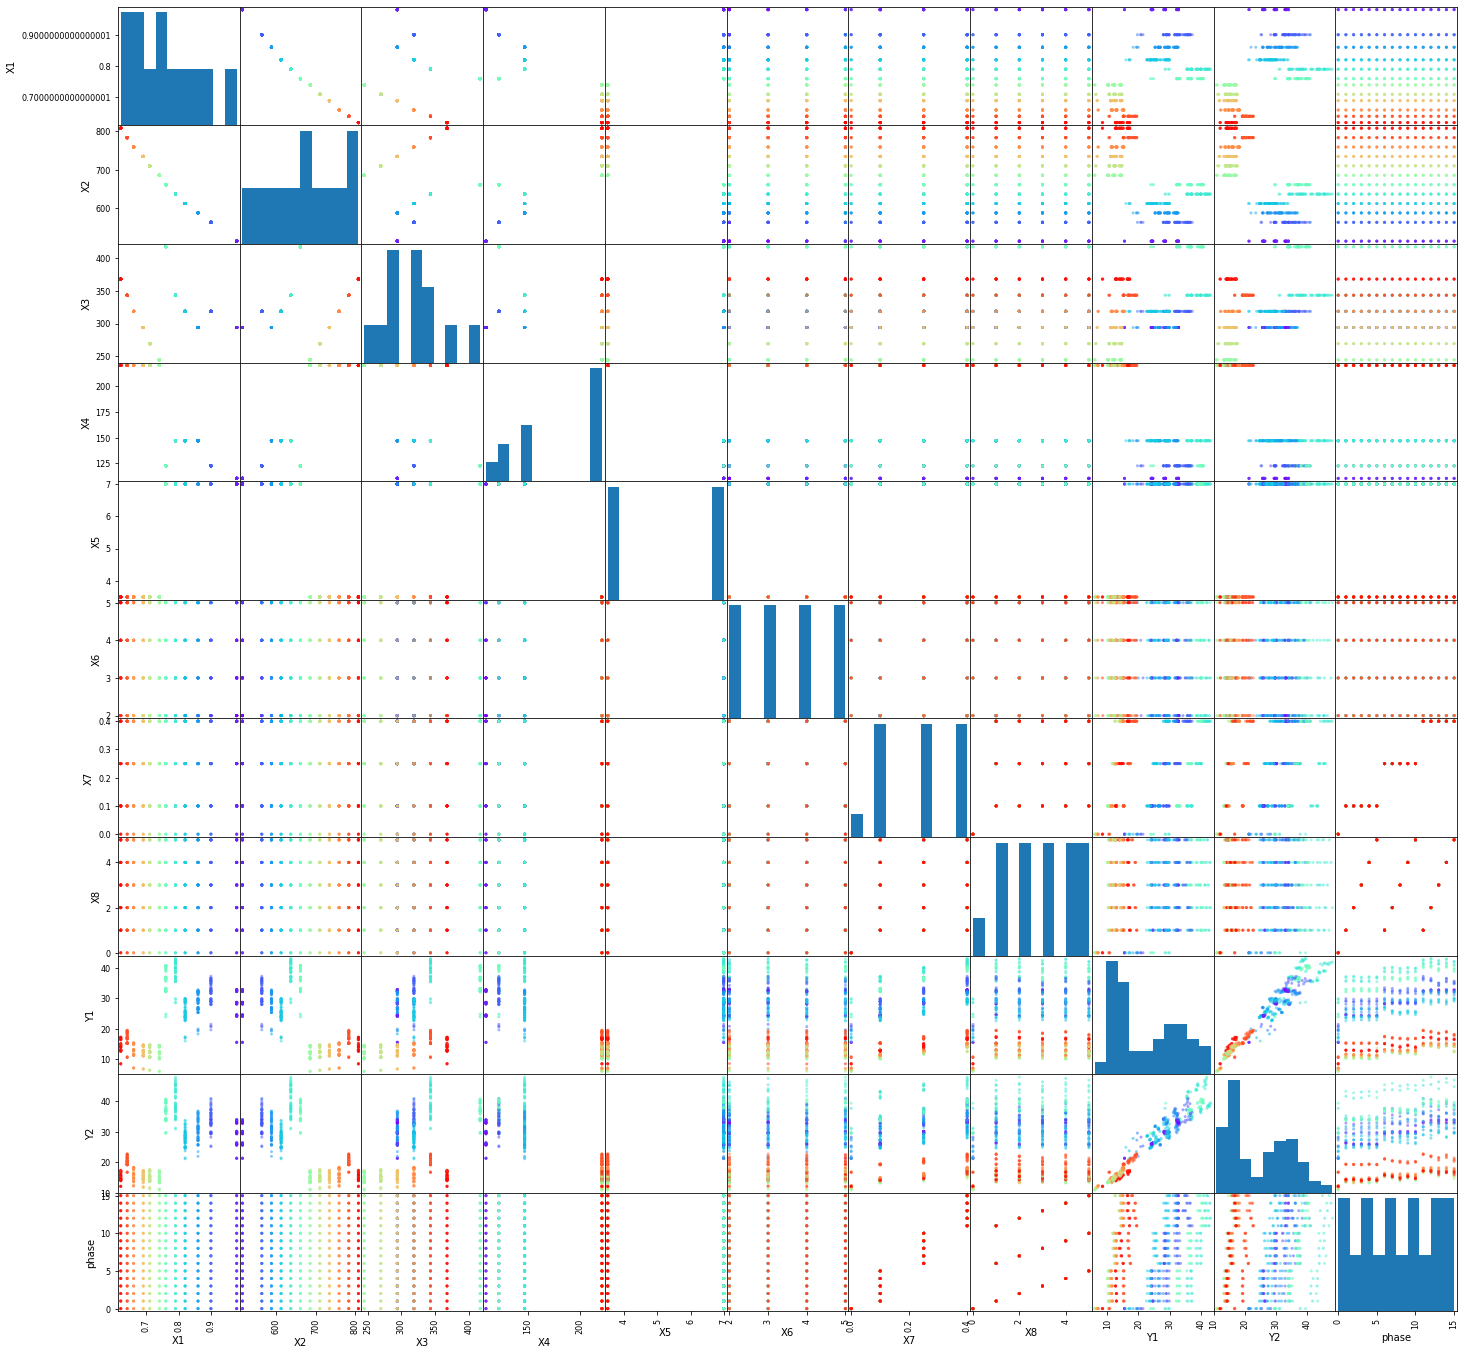

In [10]:
color = 'cycle'
gradient = np.unique(df1[color])
colors = cm.rainbow(np.linspace(0, 1, len(gradient))) 
colordict = dict(zip(gradient, colors))  
colors_mapped = df1[color].map(lambda x: colordict.get(x))
ax = scatter_matrix(df1.drop([color],axis=1),color=colors_mapped, figsize = (24, 24))

In [11]:
features = df1.drop(['Y1','Y2'], axis = 1).columns
#dfN =preprocessing.normalize(df1.drop(['Y1', 'Y2'], axis = 1),norm='max',axis=0)
dfN =preprocessing.normalize(df1[features],norm='max',axis=0)

X=dfN
y = df1['Y1']
y = y.ravel()

In [12]:
X_train = X[0:550]
X_test = X[551:]

y_train = y[0:550]
y_test = y[551:]

## Voorspelling - lineaire regressie

Mean Absolute Error: 2.130023853308965
Mean Squared Error: 7.84187453436137
Root Mean Squared Error: 2.80033471827233
Determination coefficient: 0.9624635368037363
Explained variance: 0.9630503259685874


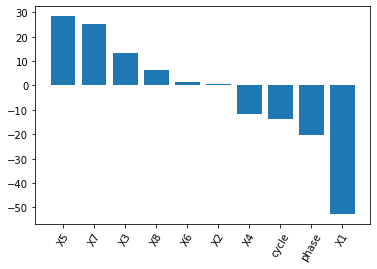

In [13]:
from sklearn import linear_model

linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)
y_targetLR=linreg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_targetLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_targetLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_targetLR)))
print('Determination coefficient:', np.sqrt(metrics.r2_score(y_test, y_targetLR)))
print('Explained variance:', np.sqrt(metrics.explained_variance_score(y_test, y_targetLR)))


df=pd.DataFrame({'Features':features,'Coeff':linreg.coef_})
df=df.sort_values('Coeff',ascending=False)
ax = plt.bar(df.Features,df.Coeff)
ax =plt.xticks(df.Features,rotation=60)

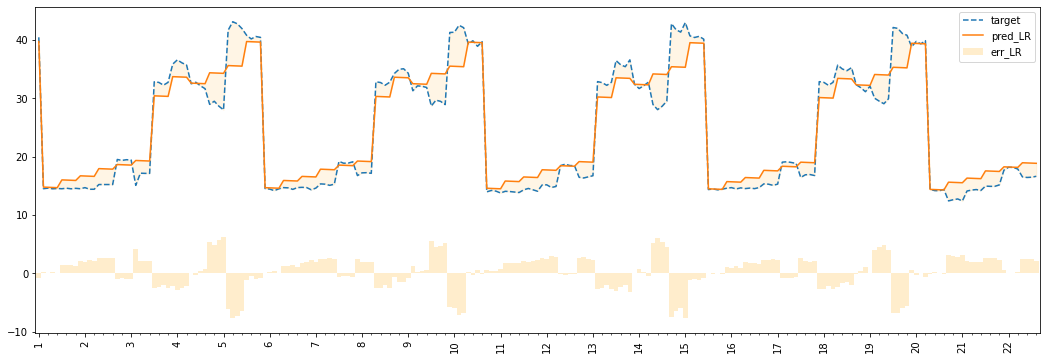

In [16]:
f, ax = plt.subplots(figsize = (18,6))
df_results = pd.DataFrame()
df_results['target'] = y_test
df_results['pred_LR'] = y_targetLR
df_results['err_LR'] = y_targetLR-y_test

df_results[['target']].plot(ax = ax, style = '--') 
df_results[['pred_LR']].plot(ax = ax) 
df_results[['err_LR']].plot.bar(alpha = 0.2, width = 1, color= 'orange', ax = ax)
plt.fill_between(df_results.index, df_results.target, df_results.pred_LR, color='orange', alpha=0.1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

In [17]:
df

,Features,Coeff
4,X5,28.386629
6,X7,25.079889
2,X3,13.381727
7,X8,6.234013
5,X6,1.315347
1,X2,0.487042
3,X4,-11.745386
9,cycle,-13.861421
8,phase,-20.168811
0,X1,-52.650913
